**Estudos de Mineração de Áudio: Parte 2 - Visualizando o dataset**

**Autor:**

* [Tarcídio Antônio Júnior - 10748347](https://github.com/tarcidio)

**Links importantes:**
* [Estudos de Mineração de Áudio: Parte 1 - Extraindo os dados](https://github.com/tarcidio/analysis-ESC50)
* [ESC50](https://github.com/karolpiczak/ESC-50)
* [Introduction to Audio Analysis](https://www.sciencedirect.com/science/article/pii/B9780080993881000042)
* [Inspiração de código: André M Souza](https://github.com/andremsouza/swine_sound_analysis/blob/master/audio_kdd.py)

# **Introdução, Objetivos e Ferramentas**

**Introdução**
---
  Ciência de Dados extrai conclusões a partir de dados brutos utilizando estatística e técnicas de aprendizagem de máquina. Na primeira etapa, faz-se o  pré-processamento que se resume em, nesta ordem, extrair os dados, limpá-los e **visualizá-los**. A última é de grande importância para guiar as etapas de análise, provendo ótimas noções de como os dados se comportam, ideias de como **explorá-los**, além de encurtar o tempo de entendimento para os quais não são familiarizados com o assunto.

**Objetivo do trabalho**
---

  Para entender praticando, foi extraído um conjunto de features de um dataset de áudio chamado de ES50. Cada uma das duas mil amostras é um segmento de áudio característico de sons ambientes, animais, humanos e urbanos. No total, há 50 categorias que são os rótulos deste dataset. Neste documento, encontra-se visualizações detalhando os diversos atributos. Quando possível, expressa-se conclusões sobre os dados.

**Ferramentas**
---

  Para elaboração, utilizou-se a linguagem Python e, principalmente, as bibliotecas Pandas, Matplotlib, Seaborn, Scikit-learn, Plotly e Numpy. Algumas das inúmeras ferramentas visuais utilizadas foram:
* Mapa de calor
* Gráfico de barras
* Gráfico de dispersão
* Coordenadas paralelas
* Boxplot
* Gráfico de linhas
* Treemap

**Origem dos dados**
---

Por fim, vale ressaltar que toda a explicação da extração destes dados encontra-se em [Estudos de Mineração de Áudio: Parte 1 - Extraindo os dados](https://github.com/tarcidio/analysis-ESC50). Cada atributo do dataset será explicado, porém as mesmas informações podem ser encontradas no capítulo 5, de nome "Audios Features", do livro [Introduction to Audio Analysis](https://www.sciencedirect.com/science/article/pii/B9780080993881000042) do Theodoros Giannakopoulos e Aggelos Pikrakis.

**Observações finais**
---

Para fins didático e interativos, ao longo de todo `.ipynb`, a explicação será feita com primeira pessoa do plural como pronome pessoal.


**Créditos**
---

Para estudar mais sobre esta área, recebi bastante apoio do André M Souza e da professora Elaine Parros. Deixo aqui meu imenso agradecimento a eles.

# **Importando bibliotecas, inicializando e vendo o dataset**

Como descrevemos, usamos as seguintes bilbiotecas:
* [Pandas](https://github.com/pandas-dev/pandas): para manipular os dados e fazer sua análises
* [Matplotlib](https://github.com/matplotlib/matplotlib): para criar gráficos e visualizar dados no geral
* [Plotly](https://github.com/plotly/plotly.py): para criar gráficos interativos
* [Seaborn](https://github.com/seaborn): para visualizar dados baseados no matplotlib
* [Numpy](https://github.com/numpy/numpy): processamento de arrays n-dimensionais e fornece grande coleção de funções matemáticas de alto nível para operar estes arrays
* [Scikit-learn](https://github.com/scikit-learn/scikit-learn): biblioteca de aprendizado de máquina 

Importemos:

In [ ]:
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display as lrdisp
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn import preprocessing 

#Verificando se está usando o Google Colab
try:
    from google.colab import drive
    drive.mount('/content/mount')
    IN_COLAB = True
except:
    IN_COLAB = False

Mounted at /content/mount


Lendo o dataset:

In [ ]:
if IN_COLAB:
  #Indique o caminho do arquivo .csv dentro do seu drive
  #Para encontrar: abrir'Arquivos' na barra lateral esquerda
  CSV_PATH: str = '/content/mount/MyDrive/Colab Notebooks/Iniciação Cientifica/ESC50/feature.csv' 
  esc50 = pd.read_csv(CSV_PATH)
else:
  esc50 = pd.read_csv('feature.csv')

A definição destas strings serão importantes para salvar futuras imagens

In [ ]:
if IN_COLAB:
  ROOT_PATH : str = '/content/mount/MyDrive/Colab Notebooks/Iniciação Cientifica/ESC50/'
  AUDIOS_PATH: str = '/content/mount/MyDrive/Colab Notebooks/Iniciação Cientifica/ESC50/audios/'
else:
  ROOT_PATH : str = './'
  AUDIOS_PATH: str = 'audios/'

In [ ]:
#Carregando dataset que contem as categorias
esc50_category_origin = pd.read_csv('https://raw.githubusercontent.com/karolpiczak/ESC-50/master/meta/esc50.csv')
#Deixando apenas as colunas 'target' e 'category'
esc50_category = esc50_category_origin.drop(columns = ['filename', 'fold', 'esc10', 'src_file', 'take'])
#Agrupando categorias com mesmo target
esc50_category = esc50_category.groupby('target').first()

#Unindo dataset original com as categorias
esc50_categorized = pd.merge(esc50, esc50_category, on = 'target')

#Reorganizando as colunas: colocar 'category' ao lado de 'target'
new_columns = [*esc50.columns[:4],*['category'],*esc50.columns[4:]]
esc50_categorized.reindex(columns = new_columns)

esc50 = esc50_categorized

# **Propriedades básicas do dataset**

## **Linhas e colunas**

Atributos do dataset

In [ ]:
esc50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   filename                       2000 non-null   object 
 1   filepath                       2000 non-null   object 
 2   fold                           2000 non-null   int64  
 3   target                         2000 non-null   int64  
 4   src_file                       2000 non-null   int64  
 5   take                           2000 non-null   object 
 6   zero_crossing_rate             2000 non-null   float64
 7   zero_crossings                 2000 non-null   int64  
 8   spectrogram                    2000 non-null   float64
 9   mel_spectrogram                2000 non-null   float64
 10  harmonics                      2000 non-null   float64
 11  perceptual_shock_wave          2000 non-null   float64
 12  spectral_centroids             2000 non-null   f

Quantidade de amostras por quantidade de features:

In [ ]:
esc50.shape

(2000, 94)

## **Duplicadas**

`pandas.DataFrame.duplicated()`: por padrão, verifica, linha por linha, e retorna uma tabela com duas colunas: 
* **1ª coluna**: index
* **2ª coluna**: `bool` indicando se a linha é repetida de outra (`True`) ou se for a primeira ocorrência (`False`)

Argumento `subset=['filename']` restringe a análise da linha toda para a análise de ocorrência na coluna `'filename'`

In [ ]:
esc50.duplicated(subset=['filename'])

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

`pandas.DataFrame.value_counts()`: retorna tabela indicando a quantidade de ocorrência de cada amostra do DataFrame

In [ ]:
print("Amostras duplicadas no dataset:",
      esc50.duplicated(subset=['filename']).value_counts(),
      sep='\n')

Amostras duplicadas no dataset:
False    2000
dtype: int64


## **Valores nulos**

* `pandas.DataFrame.isnull()` (alias para `pandas.DataFrame.isna()`): retorna um DataFrame do mesmo tamanho indicando com células com valores ausentes (`True`) e não ausentes (`False`)
* `pandas.DataFrame.any()`: para cada coluna, retorna `False` se não houver pelo menos um elemento `True`. Caso contrário, retorna `True`.

In [ ]:
esc50.isnull().any()

filename              False
filepath              False
fold                  False
target                False
src_file              False
                      ...  
mfcc_accelerate_18    False
mfcc19                False
mfcc_delta_19         False
mfcc_accelerate_19    False
category              False
Length: 94, dtype: bool

# Lista de Atributos para visualizar:

* Quantidade de áudios para cada uma das categorias
* zero_crossing
* spectrogram
* mel_spectrogram
* harmonics
* perceptual_shock_wave
* spectral_centroids
* chroma
* tempo_bpm
* spectral_rollof
* spectral_flux
* spectral_bandwidth
* mfcc

OBS: EXPLICAR O DATASET e também as features
normalizar os dados

pq n ao foi do interesse do andre clacular outros atributos descritos no livro?

rever os atibutos deposi q  o andre explicar os coeficientes




In [ ]:
#n_fft: tamanho de window dado em amostras
#hop_length: tamanho do hop dado em amostras
#d_audio[i].size = 216
#d_audio.size = qnt_frame/2
#Quantidade de amostras no áudio: 220.500 = n_fft*db_audio[0].size/2

#Conclusões:
#Shape da matriz: 216x221400
d_audio = np.abs(lr.stft(x, n_fft = 2048, hop_length = 2*512))
db_audio = lr.amplitude_to_db(d_audio, ref=np.max)
np.mean(db_audio)


#PAREI AQUI: verificar se tem mais 

# **Distribuição das amostras de dados**

In [ ]:
size_category = esc50.groupby('category').size().to_frame()
size_category.columns = ['size']
size_category_sorted = size_category.sort_values(by = 'size', ascending = False)

In [ ]:
bar= px.bar(size_category_sorted,
                    x = size_category_sorted.index,
                    y = 'size',
                    title = "Quantidade de músicas por gênero")
bar.show()

É um dataset muito bem comportado

In [ ]:
esc50.describe().drop(index = 'count', axis = 0)

mapa de calor com todos os atributos é completamente inviavel, mas dão sugestões da onde fazer novos mapas de calor

In [ ]:
plt.figure(figsize = (150,150))

esc50_corr = esc50.corr()
sns.heatmap(esc50_corr, annot=True, cmap="RdBu", vmin=-1, vmax=1);

inviavel coordenadas paralelas tem que dar uma olahda por categoria que nem fez no outro trabalho

In [ ]:
plt.figure(figsize = (150,150))
parallel = px.parallel_coordinates(esc50, color="target",
    dimensions = new_columns,
    color_continuous_scale = px.colors.diverging.Tealrose,
    color_continuous_midpoint = 2,
    title = 'titlo')
parallel.show()

# **Conceitos iniciais**

Antes de prosseguir, é importante introduzir alguns conceitos para compreensão das features. São elas:

* **Amostras**: para transformar o som em algo computável, é necessário capturar o som. Mas isso não é feito de forma estritamente contínua. Captura-se uma amostra do som instante a instante (a cada milésimos de segundo). A união de todas as amostras forma o segmento de áudio, passando a sensação de que a captura do som foi contínua. Chamamos de taxa de amostragem o número de amostras capturadas por unidade tempo (Exemplos: $r_s = \frac{N_{amostras}}{segundos} = \frac{16000 amostras}{2 segundos} = 8$ kHz).

* **Período de amostragem**: é o intervalo de tempo $T_s$ entre o fim de uma amostra e o início de outra em um segmento. Espera-se que o $T_s$ seja igual ao longo de todo o segmento.

* **Frequência de amostragem**: $f_s = \frac{1}{T_s}$. Semanticamente, é a frequência com que se começa e termina uma amostra ao longo do áudio.

* **Função da onda ou série da onda**: a intensidade da onda do segmento de áudio pode ser representada através de uma função $x(t) \in [-1,1]$, com $t = 0, 1, 2, ..., N -1$, com $N$ sendo a quantidade de amostras. Em geral, esse sinal é dado como algo parecido com $x(t) = Acos(\omega t + \phi)$.



* **Transformada Discreta de Fourier**: é uma função que transforma a função da onda $x(n)$, $n = 0, 1, ..., N-1$ em uma nova função $X(k) \in \mathbb{C}$ com $k = 0, ..., N - 1 $ sendo o índice da amostra. A função resultante $X(k)$ é o valor da frequência da onda para cada uma das amostras $k$. Sendo $j \equiv \sqrt[]{-1}$, a função é dada por $$X(k) = \sum_{n = 0}^{N-1}x(n)exp(-j\frac{2\pi}{N}kn)$$

Cada valor pertencente a imagem da função $X(k)$ é chamado de Coeficiente da Transformada Discreta de Fourier. Note que a frequência é dada em forma de número complexo. Nem sempre a frequência é usada, mas sim sua intensidade (ou módulo): $|X(k)|$.

* **Técnicas short-terms**: apesar do processamento do áudio ter sido apresentado usando a função de onda $x(t)$ inteira, os algoritmos mais famosos, na verdade, "quebram" a função da onda em pequenos intervalos ininterruptos de amostras para só então processá-los de alguma maneira. Chama-se essas técnicas de short-terms.

* **Short-Time Fourier Transform (STFT)**: técnica que aplica, para cada short-term, a Transformada Discreta de Fourier. Desta maneira, o resultado final do STFT é um vetor com $F$ elementos: cada um sendo uma função $X(k)$ correspondentes àqueles intervalos.

* **Frames**: cada um destes intervalos de amostras (short-terms) que foi separado para calcular os coeficientes são chamados de frames. Os frames não necessariamente são disjuntos um dos outros. Quando há sobreposição (e geralmente há), chamamos esta sobreposição de *overlapping*. A forma de onda do i-ésimo frame $x_i(t)$ é o valor da onda original no window associado e zero fora dele (como será mostrado a seguir).

* **Window**: formato geométrico (geralmente retangular) que determina como será calculado frames em um conjunto de amostras que determinam uma onda. Ou seja, para o nosso caso, é o tamanho do retângulo que vai selecionar as amostras para calcular frames. Não confunda window com frames. Frames são os intervalos em si enquanto o window é o formato que esses intervalos terão. Janelas mais longas levam a melhor resolução da frequência. Janelas mais curtas levam a representação mais detalhada no domínio do tempo.

* **Window function**: é a função, baseada na escolha do window, que é usada para modelar os frames. Se determinamos a largura de window como sendo $W_L$, a window function trandicionalmente será: 

$$ w(n) = \left\{ \begin{array}{ccc}
    1, & 0 \le  n \le W_L - 1\\
    0, & c.c. \\
\end{array} \right. $$

e então haverá $F$ funções de ondas $x_i(n)$, sendo $F$ o número de frames. Cada função de onda será dada por:

$$x_i(n) = x(n)w(n - m_i)$$

com $i = 0, 1, ..., F - 1$ e $m_i$ a distância, em amostras, do início do (i-1)-ésimo frame para o início do i-ésimo frame. Deste modo, garantimos que, fora da faixa de window do i-ésimo frame, o sinal será zerado na função $x_i(n)$. Observe que:

$$ w(n - m_i) = \left\{ \begin{array}{ccc}
    1, & m_i \le  n \le m_i + W_L - 1\\
    0, & c.c. \\
\end{array} \right. $$

Por fim, vale ressaltar que o $W_L$ costuma variar de 10ms a 50ms.

* **Tamanho do Hop ($W_S$)**: é o tempo de sobreposições entre frames. O $m_i$ é dependente do tamanho do hop, pois sua fórmula é $m_i = i \cdot W_S \cdot f_s$. Usualmente, $W_S$ varia de 10ms a 50ms.

* **Transformada de Fourier de Curto Tempo** (mais conhecido pelo nome inglês: Short-Time Fourier Trasnform): é a Transformada de Discreta de Fourier usada em conjunto com a técnica de janelas deslizantes. Neste caso, frame também é chamado de short-term.



---

**Exemplo**: Se uma janela possui um tamanho de hop $W_s = 10$ $ms = 0.01$ $s$ e uma frequência de amostragem de $F_s = 16$ $kHz$, então $m_i = i \cdot W_S \cdot f_s = i \cdot 0.01 \cdot 16000 = i \cdot 160$ amostras, $i = 0, ..., K -1$. Portanto, se $W_L = 300$ amostras, então o quinto frame ($i = 4$) começa na amostra de índice $160 \cdot 4 = 640$ e termina na amostra de índice $160 \cdot 4 + 300 - 1 = 939$.

---

* **Espectrograma**: considerando que cada amostra, atravéis do processo do STFT, estará associado a vários coeficientes DFT, podemos criar uma imagem na qual o eixo horizontal é o tempo (ou amostras) e a vertical é a representação da magnitude da frequência em cada tempo. Essa imagem é chamada espectrograma e apresenta a evolução do sinal no domínio do tempo-frequência. Para gerar o espectrograma, podemos usar a magnitude ou a magnitude ao quadrado dos coeficientes STFT em escala linear ou logarítmica (dB).

# **Forma da onda e espectrograma de uma amostra aleatória**

* `np.random.choice`: retorna aleatoriamente, em forma de numpy array, uma amostra do vetor unidimensional
* `librosa.load(file_name)`: carrega o áudio

In [ ]:
file_name = AUDIOS_PATH + np.random.choice(esc50['filename']) + '.wav'
x, sr = lr.load(file_name)

`plt.subplot()`: cria conteiner com subplots. Parâmetros:
* `nrows`: número de linhas
* `ncols`: número de colunas
* `sharex`: indica que o eixo `x` será compartilhado entre os subplots
* `sharey`: indica que o eixo `y` será compartilhado entre os subplots

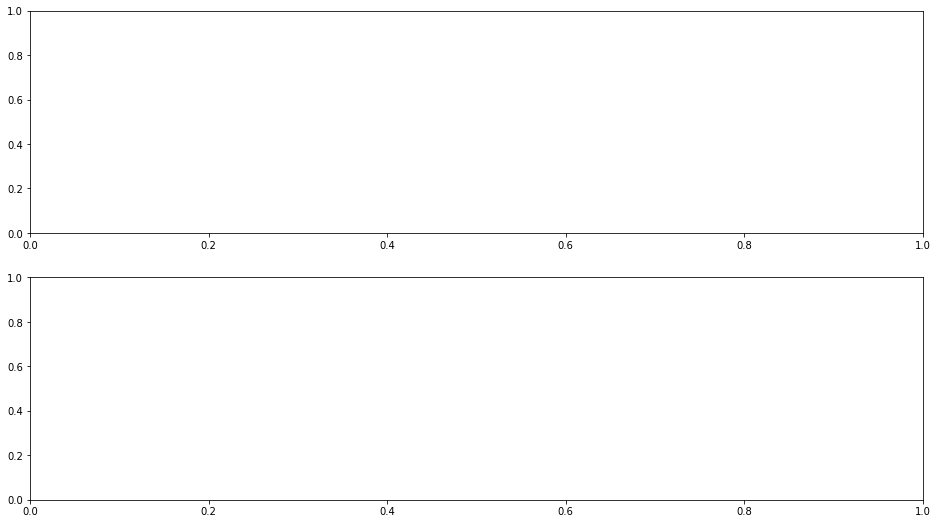

In [ ]:
#fig: conteiner que armazenará a figura
#ax: um objeto Axes ou um array de objetos Axes (cada um referênciando um subplot)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(16, 9))

`lrdisp.waveshow()`: plota a amplitude da onda (domínio do tempo). Parâmetro:
* `y`: série temporal de audio
* `sr`: taxa de amostragem (rs)
* `ax`: objeto Axes que representa o eixo de plot

In [ ]:
lrdisp.waveshow(
    x,
    sr = sr,
    ax = ax[0]
) 

`lr.stf(x)`: short-time Fourier transform (STFT) que representa o sinal no domínico do tempo e frequencia. 

In [ ]:
angle = lr.stft(x)
#Note que, para cada valor, existe um eixo real e imaginário
angle

array([[-3.49798536e+00+0.0000000e+00j, -8.02139044e-01+0.0000000e+00j,
         1.14937496e+00+0.0000000e+00j, ...,
        -2.36589640e-01+0.0000000e+00j, -2.88942486e-01+0.0000000e+00j,
        -3.21529150e-01+0.0000000e+00j],
       [ 4.66856480e+00-2.0229857e-16j, -1.41038215e+00+2.7158463e+00j,
        -5.53259373e-01-7.3812425e-01j, ...,
         1.16614684e-01-2.0489605e-02j,  1.47935197e-01-2.1794885e-02j,
         1.69711843e-01-7.3049217e-03j],
       [-7.31978130e+00+4.5821356e-17j,  3.06118059e+00+1.0009549e+00j,
         7.44456589e-01+4.7259188e-01j, ...,
         2.74702087e-02-1.2634474e-02j, -3.60154286e-02+1.0013184e-02j,
        -4.51058848e-03+4.8755474e-02j],
       ...,
       [ 3.01473830e-02-6.6638041e-17j, -1.50736403e-02+2.0650705e-06j,
         5.34823563e-09-5.1437365e-07j, ...,
        -6.10238438e-09+2.0935760e-09j,  5.86700844e-05+9.9319928e-05j,
        -2.17388661e-04-3.6782559e-04j],
       [-3.01447529e-02+9.4745717e-17j,  6.19985599e-07+1.5071881e-0

Para capturar
* Eixo real: `np.abs(D[..., f, t])` (função magnitude da frequência)
* Eixo imaginário: `np.angle(D[..., f, t])` (função fase da frequência)

`lrdisp.specshow()`: exibi o espectrograma de uma onda. Parâmetros:
*  `lr.amplitude_to_db()`: converte a amplitude do espectrogram para dB
* `y_axis`: escala do `y`
* `x_axis`: escala do `x` (quando é marcado como 'time', será automaticamente mostrado como milisegundos, segundos, minutos ou horas)
* `ax`: objeto Axes que representa o eixo de plot

In [ ]:
lrdisp.specshow(lr.amplitude_to_db(np.abs(angle), ref=np.max),
                      y_axis='log',
                      x_axis='time',
                      ax=ax[1])

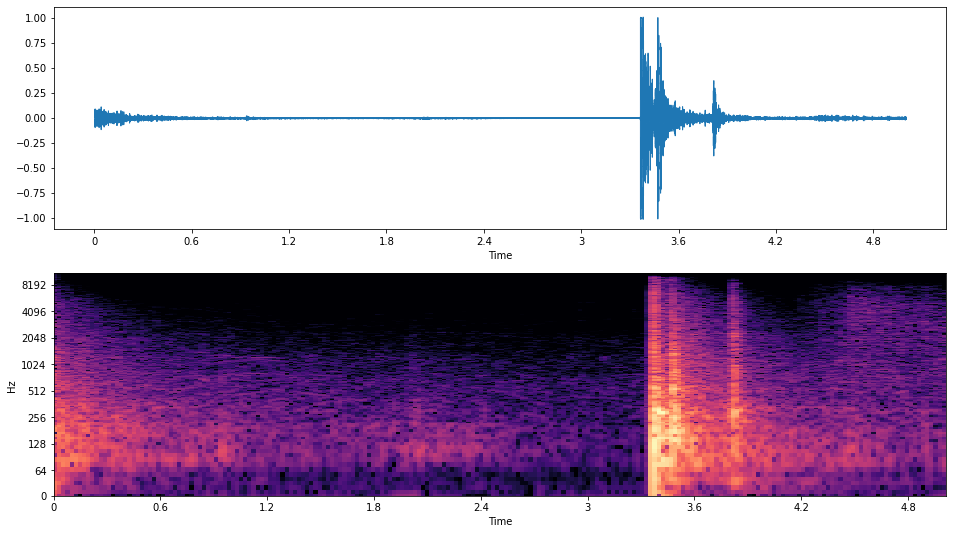

In [ ]:
fig

# **Modularizando funções de visualização**

In [ ]:
category = 'category'
dataset = esc50

In [ ]:
def describe_feature(feature: str) -> pd.DataFrame:
  feature_describe = dataset.groupby(category).describe()[feature].drop(columns = 'count')
  return feature_describe

In [ ]:
def bar_mean_feature(feature: str):
  mean_feature = dataset.groupby(category).mean()
  mean_feature.sort_values(by = feature, ascending = False, inplace = True)
  bar = px.bar( mean_feature,
                x = mean_feature.index, 
                y = feature, 
                title = "Média de " + feature + " por som")
  bar.show()

In [ ]:
def redgeline_feature(feature: str):
  #Não consegui adicionar um título, infelizmente ;(
  redgeline = sns.FacetGrid(dataset, row = category, hue = category, aspect = 2.5, height = 2.5) 
  redgeline.map(sns.kdeplot, feature, clip_on = True, 
        shade=True, alpha=0.7, lw=2, bw=.4)

In [ ]:
def box_feature(feature:str):
  box = px.box(dataset,
          #points = 'all',
          y = feature, 
          title = "Box plot do data set para o atributo " + feature)
  box.show()

In [ ]:
#Fazer a devida documentação das funções
def plot_bar(ter_percent : pd.core.frame.DataFrame, feature : str, title : str):
  bar = px.bar( ter_percent,
                x = ter_percent.index, 
                y = feature, 
                height = 750,
                width = 1500,
                title = title)
  bar.show()

def ter_percent_func (feature: str, bool_ascending : bool):
  #Ordenando o DataFrame segundo a feature
  more_less_feature = dataset.sort_values(by = feature, ascending = bool_ascending)

  #Coletando os 10% menores ou maiores
  ten_percent_head = more_less_feature.head(int(0.1*len(more_less_feature.index)))

  #Agrupando por categoria e tirando a média
  ten_percent_head_feature = ten_percent_head.groupby(category).mean()
  #Ordenando o recorte
  ten_percent_head_feature.sort_values(by = feature, ascending = False, inplace = True)
  #Setando o título
  if bool_ascending:
    title = "Média de " + feature + " entre os sons 10% com menos " + feature
  else:
    title = "Média de " + feature + " entre os sons 10% com mais " + feature
  #Executando o plot
  plot_bar(ten_percent_head_feature, feature, title)

  #Agrupando por categoria e fazendo a contagem
  ten_percent_num_head = ten_percent_head.groupby(category).size()
  #Ordenando o recorte
  ten_percent_num_head.sort_values(ascending = False, inplace = True)
  if bool_ascending:
    title = "Quantidade de sons por categoria nos 10% com menos " + feature
  else:
    title = "Quantidade de sons por categoria nos 10% com mais " + feature
  #Executando o plot
  plot_bar(ten_percent_num_head, ten_percent_num_head, title)

def bar_10_percent_feature (feature : str):
  #Primeiro bloco: 10% com mais feature
  ter_percent_func(feature, False)
  #Segundo bloco: 10% com menos feature
  ter_percent_func(feature, True)

In [ ]:
def box_feature_specifc (feature: str, category_value: str):
  box = px.box(dataset[dataset[category] == category_value],
      #points="all",
      y = feature,
      title = "Box plot do gênero " + category_value + " para o atributo " + feature)
  box.show()

In [ ]:
def hist_feature_specifc (feature: str, category_value: str):
  hist = px.histogram(dataset[dataset[category] == category_value], 
                  x = feature, 
                  nbins = 200,
                  title = "Distribuição dos sons segundo o atributo " + 
                    feature + " para a categoria " + category_value)
  hist.show()

# **Espectrograma**


Spectrogram é a intensidade média da frequência do segmento de áudio medido em decibéis. Os valores geralmente variam entre -60 e 0 db.

In [ ]:
feature = 'spectrogram'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parame

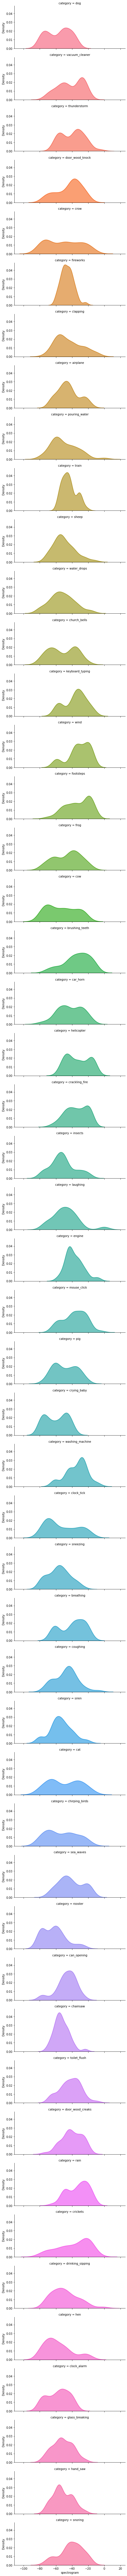

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Mel-Espectrograma**

A escala Mel, assim como o decibel, é um outra escala de intensidade de áudio. Ela introduz um efeito de distorção de frequência em uma tentativa de adequar o som a certas observações psicoacústicas as quais o sistema auditivo humano pode distinguir mais facilmente. A função de distorção é:

$$f_w = 1127.01048 \cdot log(1 + f/700)$$

* $f_w$: função frequência de distorção
* $f$: função frequência da onda

In [ ]:
feature = 'mel_spectrogram'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parame

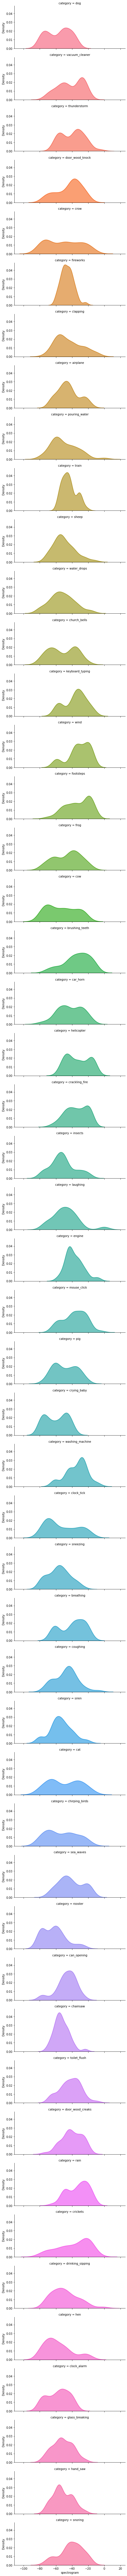

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Harmonics**

Harmonicos são caracteristicas que representa a cor dos sons (componente harmônico do som ou timbre).

In [ ]:
feature = 'harmonics'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Perceptual Shock Wave**

Perceptrual shock wave representa o ritmo e a emoção do som (ou componente percussiva). O cálculo é feito pela biblioteca libriosa.

In [ ]:
feature = 'harmonics'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Zero Crossings**

O Zero Crossing Rate (ZCR) mede o número de vezes que o sinal no domínio do tempo muda de sinal (em linguagem vulgar, é a quantidade de vezes que o sinal no domínio do tempo para de subir e começa a descer ou para de descer e começa a subir). Mesmo sendo calculado no domínio do tempo, esse atributo descreve bem a quantidade de energia de alta frequência de um sinal. ZCR é fortemente correlacionado com o Spectral Centroid (atributo a ser descrito mais adiante). ZCR também se provou bem descritivo para classes de intrumentos de percussão.

In [ ]:
feature = 'harmonics'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Spectral Centroids**


Além do MFCCs e a descritores de energia com largura de banda, features com formato espectral mais simples também pode ser úteis. Neste grupo, incluem-se Spectral Centroi, Spectral Spread, Spectral Skewness e Spectral Kurtosis

Spectral Centroid é o centro de massa de um áudio e pode ser calculado a partir de:

$$ C_i = \frac{\sum^{W_{f_L}}_{k=1} k \cdot X_i(k)}{\sum^{W_{f_L}}_{k-1} X_i(k)} $$

Onde
* $C_i$: Spectral Centroid do i-ésimo frame do áudio
* $k$: índice das amostras do i-ésimo frame do áudio
* $W_{f_L}$: o número de amostras do i-ésimo frame
* $X_i(k)$: coeficientes da Transformada Discreta de Frourier (DFT) do sinal o i-ésimo frame do áudio (frequência de cada uma das amostras do frame)

Valores altos para essa feature costumam indicar que o som é mais "claro". Em outras palavras, sons que são apenas ruído de fundo, silêncio ou coisas parecidas (veja 'others1' da figura abaixo) possuem frames com Spectral Centroid menor. Já sonas mais abruptos (veja 'others2' e 'others3' da figura abaixo) possuem frames com Spectral Centroid maior.


**Figura 1**: Diferenças entre Spectral Centroid entre três classes de sons.

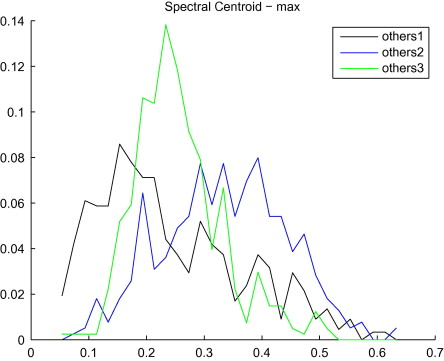

**Fonte**: Chapter 4 - audio features. In: GIANNAKOPOULOS, T.; PIKRAKIS, A. (Ed.). Introduction to Audio Analysis. Oxford: Academic Press, 2014. p. 59 – 103. ISBN 978-0-08-099388-1. Disponível em: <http://www.sciencedirect.com/science/article/pii/B9780080993881000042>.

In [ ]:
feature = 'harmonics'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# Spectral Centroids (Delta and Accelerate)

In [ ]:
feature = 'harmonics'

## **Visões Gerais**

### *Descrição geral:*

In [ ]:
describe_feature(feature)

### *Gráfico de barra da médio para cada categoria:*

In [ ]:
bar_mean_feature(feature)

### *Redgeline da distribuição para cada gênero:*

In [ ]:
redgeline_feature(feature)

### *Box plot da feature:*

In [ ]:
box_feature(feature)

## **10% com mais feature e 10% com menos feature**

In [ ]:
bar_10_percent_feature(feature)

## **Categorias destaque para esta feature**

In [ ]:
more_prominent = 'rooster'
less_prominent = 'footsteps'

In [ ]:
box_feature_specifc(feature, more_prominent)

In [ ]:
hist_feature_specifc(feature, more_prominent)

In [ ]:
box_feature_specifc(feature, less_prominent)

In [ ]:
hist_feature_specifc(feature, less_prominent)

# **Chroma features**




Chroma Vector é um representação, composta por 12 elementos, da energia espectral. É largamente usada em aplicações envolvendo música. Essa feature é computada através do agrupamento de coeficientes da Transformada Discreta de Fourier (DFT) de um short-term window em 12 bins. Cada bin representa uma das 12 classes de notas das músicas (espaçamentos entre semitons). Cada bin produz a média do log das magnitudes dos respectivos coeficientes do DFT:

-> como assim log magnitudes

$$v_k = \sum_{n \in S_k} \frac{X_i(n)}{N_k}, k = 1, 2, ..., 11$$

* $v_k$: k-ésimo chroma vector
* $S_k$: subconjunto das frequências que correspondem aos coeficientes DFT
* $N_k$: cardinalidade de $S_k$

No contexto de extração de feature, o Chroma Vector é computado sobre short-term frame. Isso resulta em um matriz $V$ de elementos $V_{k,i}$:
* $k$: pitch class (elemento do chroma)
* $i$: frame number (número do frame)
A representação desta matriz é chamada de chromograma.

A seguir, veja dois chromogramas. O primeiro é de uma música e o segundo é de uma fala humana. Chromogramas de músicas costumam ter dois ou três coeficientes dominantes estáveis por um período de tempo. Já na fala, ele é cheio de ruídos e instabilidade.

**Figura ?**: Chromograma de uma música e de fala humana

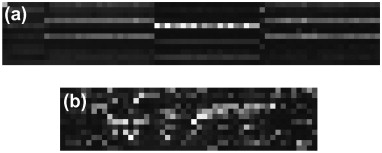

**Fonte**: Chapter 4 - audio features. In: GIANNAKOPOULOS, T.; PIKRAKIS, A. (Ed.). Introduction to Audio Analysis. Oxford: Academic Press, 2014. p. 59 – 103. ISBN 978-0-08-099388-1. Disponível em: <http://www.sciencedirect.com/science/article/pii/B9780080993881000042>.

Um pouco mais sobre `lf.features`: https://librosa.org/doc/latest/feature.html

## Gráfico 1: Visualizando Cromagrama de um áudio

In [ ]:
#DÚVIDA: INTERPRETAR
#lr.feature.chrome_sfft():Calcular um cromagrama a partir de uma forma de onda ou espectrograma de potência.
  #Parâmetro y: audio time series
  #Parâmtro sr: sampling rate of y
  #Parâmtro n_chrmoa: nmber of chroma bins to produce (12 by default)
  #DÚVIDA: NÃO SEI O QUE O PRÓXIMO ARGUMENTO QUER DIZER
  #Parâmetro n_fft: FFT window size if provided y, sr instead of S
chroma = lr.feature.chroma_stft(y=x, sr=sr, n_chroma=12, n_fft=2048)
fig, ax = plt.subplots(figsize=(16, 9))

In [ ]:
#Preenche a segunda subfigura

#lrdisp.specshow(): exibi o espectrograma de uma onda
  #Parametro chroma: matrix to displa
  #Parâmetro y_axis = 'log': escala do y
    #Possíveis escalar: ‘linear’, ‘fft’, 
  #Parâmetro x_axis = 'time': escala do x
    #Quando é marcado como 'time', será automaticamente mostrado como
    #milisegundos, segundos, minutos ou horas
  #Parâmetro ax: objeto Axes que representa o eixo de plot
img = lr.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)

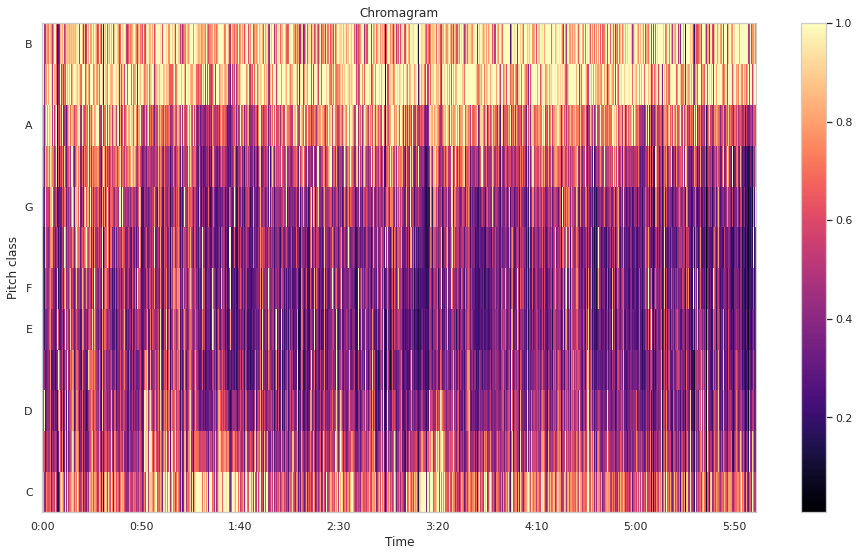

In [ ]:
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_chromagram.png',
            bbox_inches='tight',
            transparent=True)

## Gráfico 2: Distribuição de Cada Chroma antes e após o RAC

In [ ]:
chroma_cols = [
    'chroma1',
    'chroma2',
    'chroma3',
    'chroma4',
    'chroma5',
    'chroma6',
    'chroma7',
    'chroma8',
    'chroma9',
    'chroma10',
    'chroma11',
    'chroma12',
]

In [ ]:
print(df.loc[:, chroma_cols].describe())

In [ ]:
df_melt = pd.melt(df, id_vars=['rac'], value_vars=chroma_cols)
df_melt

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    row='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_chroma_features_rac.png',
            bbox_inches='tight',
            transparent=True)

Chroma features may be very useful for distinguishing musical tones.
However, related research papers didn't seem to use it for pig audio
analysis. With this, they are discard candidates.

Still, there were some interesting changes in distribution for chroma7,
chroma8, chroma9, chroma11, and chroma12, which should be further analyzed.

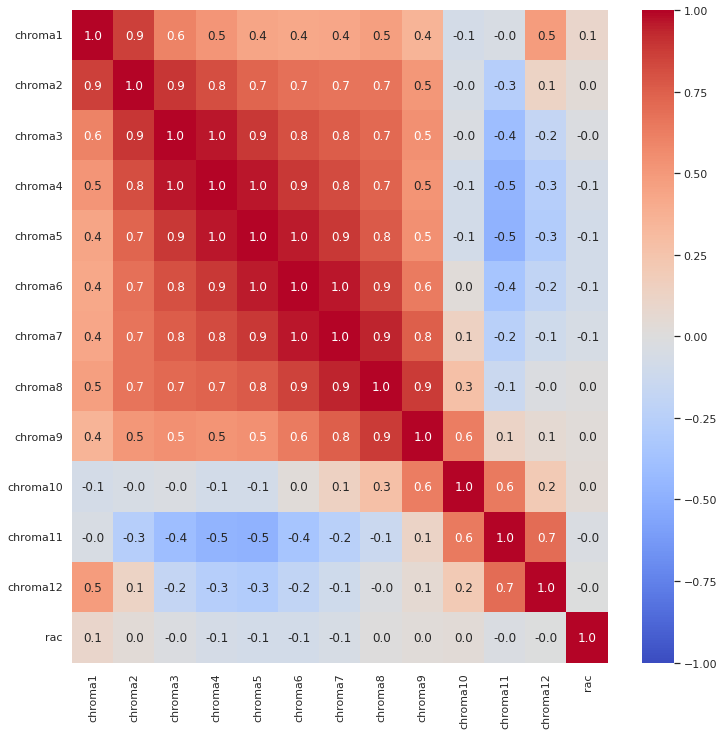

In [ ]:
plt.figure(figsize=(12, 12))
#sns.heatmap: cria um objeto que representa o mapa de calor
  #Parâmtro 1: DataFrame (neste caso, a matriz de correlação dos chromas)
  #Parâmetro vmin: valor mínimo possível no heat map
  #Parâmetro vmax: valor máximo possível no heat map
  #Parâmetro cmap: DÚVIDA
  #Parâmetro center: DÚVIDA
  #Parâmetro robus: DÚVIDA
  #Parâmetro annot: coloca o valor de cada célula
  #Parâmetro fmt: string adicionar para formatação (DÚVIDA)
sns.heatmap(df.loc[:, chroma_cols + ['rac']].corr(),
            vmin=-1.0,
            vmax=1.0,
            cmap="coolwarm",
            center=0.0,
            robust=True,
            annot=True,
            fmt='.1f')
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_chroma_features_corr.png',
            bbox_inches='tight',
            transparent=True)

As expected, the chroma features are highly correlated with their neighbors.

When comparing to our class (rac), the hightest absolute correlation between
it and a chroma feature is 0.15 which is not very substantial.

# **Tempo (BMP)**



Estimativa médio das batidas por minuto. Batidas por minuto (BPM) é uma medida de frequencia de batimento que, por sua vez, é frequência das oscilações da intensidade do som (que ocorre devido a sobreposição de ondas de frequências diferentes). Muito usada para medir [pulsação do coração](https://www.bing.com/videos/search?q=video+do+cora%c3%a7%c3%a3o+batendo&&view=detail&mid=ADD69D8975AEF280C216ADD69D8975AEF280C216&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dvideo%2520do%2520cora%25C3%25A7%25C3%25A3o%2520batendo%26qs%3Dn%26form%3DQBVR%26%3D%2525eManage%2520seu%2520Hist%25C3%25B3rico%2520de%2520Pesquisa%2525E%26sp%3D-1%26ghc%3D1%26pq%3Dvideo%2520do%2520cora%25C3%25A7%25C3%25A3o%2520batendo%26sc%3D1-24%26sk%3D%26cvid%3DA65044063C9C4B039CDEDAC50C9933CB%26ghsh%3D0%26ghacc%3D0%26ghpl%3D) e andamento de musica. Este [vídeo da KhanAcademy](ttps://pt.khanacademy.org/science/physics/mechanical-waves-and-sound/standing-waves/v/beat-frequency) explica melhor.

## Gráfico 1: Distribuição do BMP antes e depois o RAC

In [ ]:
#DÚVIDA: NÃO ENTENDI MUITO BEM O QUE É O TEMPO
print(df.loc[:, ['tempo_bpm']].describe())

          tempo_bpm
count  12106.000000
mean     114.157600
std       25.865228
min       38.566931
25%       95.703125
50%      112.347147
75%      129.199219
max      287.109375


In [ ]:
df_melt = pd.melt(df, id_vars=['rac'], value_vars=['tempo_bpm'])
df_melt

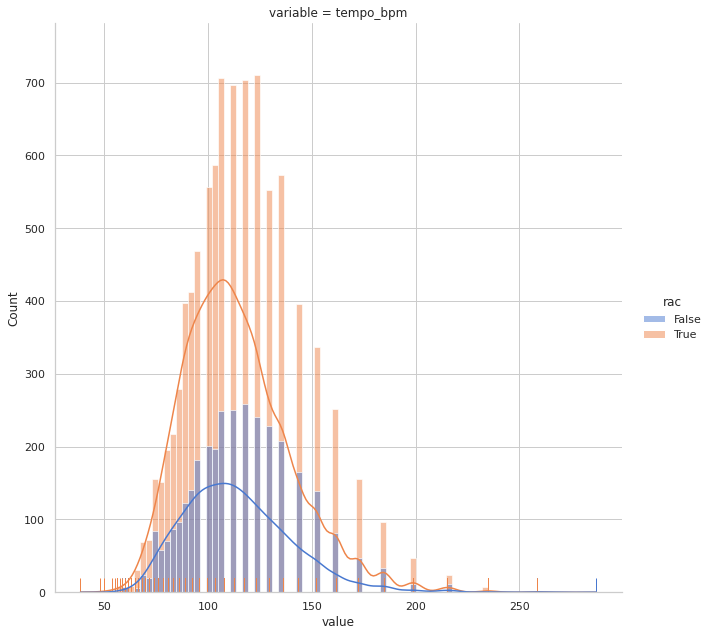

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    col='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_tempo_rac.png',
            bbox_inches='tight',
            transparent=True)

## Gráfico 2: Distribuição do BMP para diferentes quartos do dia

In [ ]:
df_tmp = df.reset_index()
df_tmp['hour'] = df_tmp['datetime'].dt.hour
df_tmp['day_quarter'] = df_tmp['hour'] // 6

In [ ]:
df_melt = pd.melt(df_tmp, id_vars=['day_quarter'], value_vars=['tempo_bpm'])

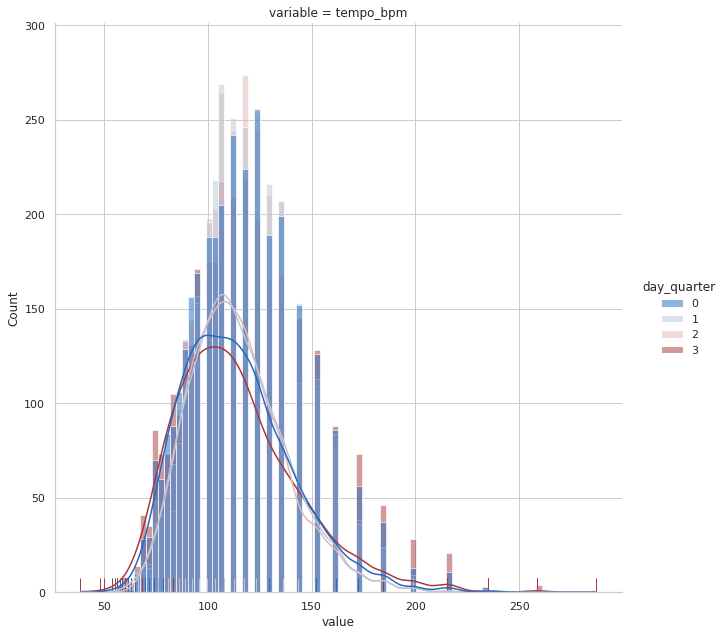

In [ ]:
sns.set(style="whitegrid",
        palette=sns.color_palette("muted", n_colors=6, desat=1.0))
sns.displot(
    data=df_melt,
    x='value',
    hue='day_quarter',
    palette='vlag',
    kde=True,
    rug=True,
    col='variable',
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_tempo_day.png',
            bbox_inches='tight',
            transparent=True)

This feature, similarly to the chroma features, is mostly used with music
analysis. No relevant differences in the distributions were observed.

This feature is a discard candidate.

Further analysis required with correlation heatmap.

# **Spectral Rolloff (85%)**




Este atributo é definido como sendo a frequência abaixo da qual um certa porcentagem (geralmente 90%, mas aqui definido como sendo 85%) da distribuição de maginitude do espectro está concentrado. Spectral Rollof pode ser usado para distinção de sons vocálicos e não vocálicos, além de diferenciar tipos de músicas.

Em linguagem matemática, se $m$ é o coeficiente da Transformada Discreta de Fourier (DFT) que corresponde ao Spectral Rolloff do i-ésimo frame, então ele satisfaz a seguinte equação:

$$\sum^{m}_{k = 1} X_i(k) = C \cdot \sum^{W_{f_L}}_{k = 1}X_i(k)$$

Onde

* $k$: índice para os coeficientes da Transformada Discreta de Fourier (DFT)
* $W_{f_L}$: o número de coeficientes da Transformada Discreta de Fourier (DFT) que são de fato usados no cálculo do Spectral Centroid.
* $X_i(k)$: magnitude dos coeficientes da Transformada Discreta de Frourier (DFT) do sinal o i-ésimo frame do áudio
* $C$: porcentagem adotada para o cálculo do Spectral Rolloff

Em geral, este atributo usa dados normalizados.

Ou seja, se em um dado instante de um segmento de áudio o Spectral Rollof for de 1000 Hz, quer dizer que a energia espectral está concentrada antes da frequência 1000 Hz. Se um outro instante este atributo valer 7500 Hz, a energia espectral está mais dispersa em outras frequências.

Na figura a seguir, é mostrado o espectrograma e a sequência do Spectral Rollof para um segmento de áudio:
* 00-05 segundos: música classica
* 05-10 segundos: música eletrônica 1
* 10-15 segundos: música eletrônica 2
* 25-20 segundos: música jazz

Note que para a música clássica e jazz, a concentração de energia espectral acontece nas frequências menores ao contrário das músicas eletrônicas.


**Figura ?**: Diferença de Spectral Rolloff entre diferentes trechos de um segmento de áudio

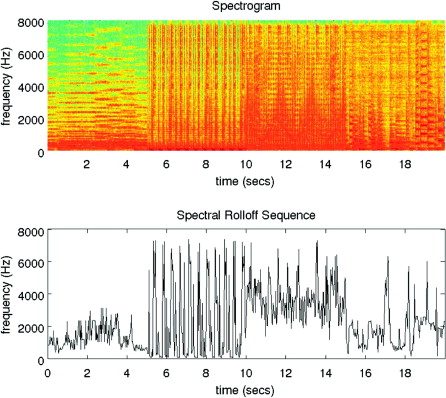

**Fonte**: Chapter 4 - audio features. In: GIANNAKOPOULOS, T.; PIKRAKIS, A. (Ed.). Introduction to Audio Analysis. Oxford: Academic Press, 2014. p. 59 – 103. ISBN 978-0-08-099388-1. Disponível em: <http://www.sciencedirect.com/science/article/pii/B9780080993881000042>.

## Gráfico 1: Distribuição do Spectral Rollof antes e depois do RAC

In [ ]:
#DÚVIDA: como interpretar ospectral rollof?
print(df.loc[:, ['spectral_rolloff']].describe())

In [ ]:
df_melt = pd.melt(df, id_vars=['rac'], value_vars=['spectral_rolloff'])
df_melt

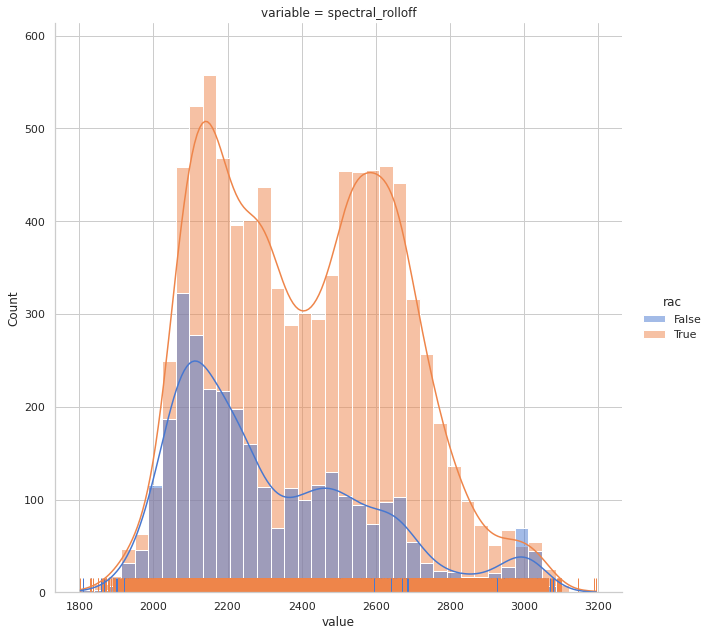

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    col='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_spectral_rolloff_rac.png',
            bbox_inches='tight',
            transparent=True)

## Gráfico 2: Distribuição do Spectral Rollof para diferentes quartos do dia

In [ ]:
df_tmp = df.reset_index()
df_tmp['hour'] = df_tmp['datetime'].dt.hour
df_tmp['day_quarter'] = df_tmp['hour'] // 6

In [ ]:
df_melt = pd.melt(df_tmp,
                  id_vars=['day_quarter'],
                  value_vars=['spectral_rolloff'])

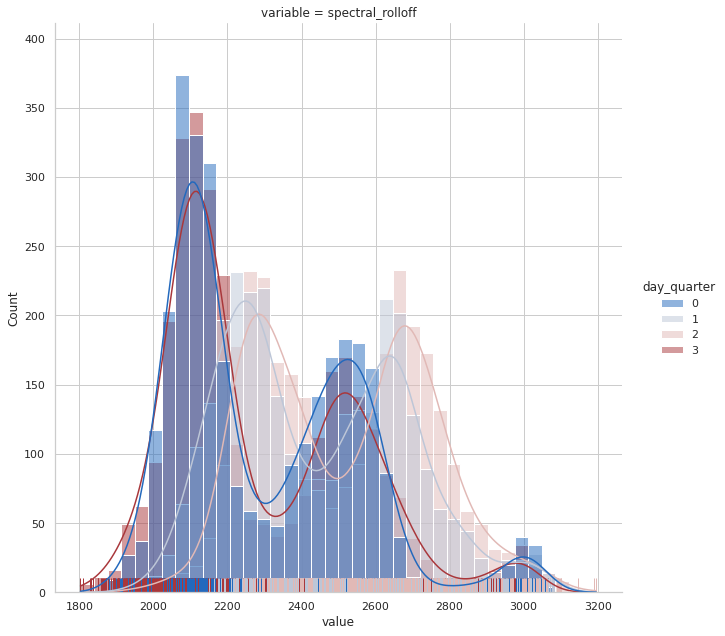

In [ ]:
sns.set(style="whitegrid",
        palette=sns.color_palette("muted", n_colors=6, desat=1.0))
sns.displot(
    data=df_melt,
    x='value',
    hue='day_quarter',
    palette='vlag',
    kde=True,
    rug=True,
    col='variable',
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_spectral_rolloff_day.png',
            bbox_inches='tight',
            transparent=True)

A slight displacement can be seem between the two groups of files.
This could reinforce the hypothesis drawn from the spectral centroid
analysis, as the 85% threshold is at a higher frequency after RAC provision.

# **Spectral Flux**

Também chamado de maginitude do espectro delta, é a medida da mudança espectral local. É definido como sendo o quadrado da norma da diferença espectral de duas sucessivas short-term windows: 

$$Fl_{(i,i-1)} = \sum^{W_{f_L}}_{k = 1} (EN_i(k) - EN_{i-1}(k))^2$$

Onde

* $Fl_{(i,i-1)}$: é o Spectral Flux do i-ésimo frame do áudio
* $KN_i(k)$: é o k-ésimo coeficiente normalizado do i-ésimo frame, dado por $EN_i(k) = \frac{X_i(k)}{\sum^{W_{f_L}}_{k=1} X_k(k)}$
* $k$: índice para os coeficientes da Transformada Discreta de Fourier (DFT)
* $W_{f_L}$: o número de coeficientes da Transformada Discreta de Fourier (DFT) que são de fato usados no cálculo do Spectral Centroid.
* $X_i(k)$: magnitude dos coeficientes da Transformada Discreta de Frourier (DFT) do sinal o i-ésimo frame do áudio


O que é mais esperado que tenha uma alta mudança espectral local: fala humana ou uma música? Provavelmente a fala, devido à rápida alternância entre os fonemas, enquanto que as músicas tendem a seguir um mesmo tom. É isso que mostra o gráfico abaixo:

Figura ?: Diferença de Spectral Flux entre uma música genérica e a fala humana.

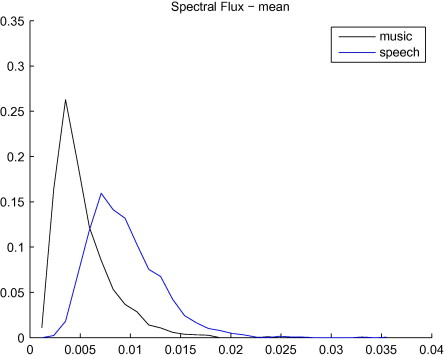

**Fonte**: Chapter 4 - audio features. In: GIANNAKOPOULOS, T.; PIKRAKIS, A. (Ed.). Introduction to Audio Analysis. Oxford: Academic Press, 2014. p. 59 – 103. ISBN 978-0-08-099388-1. Disponível em: <http://www.sciencedirect.com/science/article/pii/B9780080993881000042>.

## Gráfico 1: Distribuição do Spectral Flux antes e pós RAC

In [ ]:
#DÚVIDA: QUAL É A INTERPRETAÇÃO DO SPECTRAL?
print(df.loc[:, ['spectral_flux']].describe())

       spectral_flux
count   12106.000000
mean        0.790250
std         0.027636
min         0.697959
25%         0.768409
50%         0.787675
75%         0.808313
max         0.920871


In [ ]:
df_melt = pd.melt(df, id_vars=['rac'], value_vars=['spectral_flux'])
df_melt

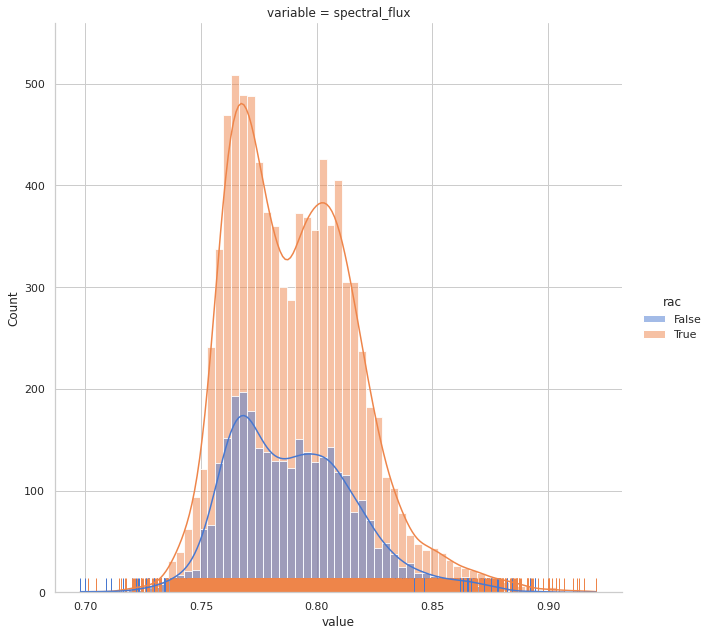

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    col='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_spectral_flux_rac.png',
            bbox_inches='tight',
            transparent=True)

## Gráfico 2: Distribuição do Spectral Flux para diferentes quartos do dia

In [ ]:
df_tmp = df.reset_index()
df_tmp['hour'] = df_tmp['datetime'].dt.hour
df_tmp['day_quarter'] = df_tmp['hour'] // 6

In [ ]:
df_melt = pd.melt(df_tmp,
                  id_vars=['day_quarter'],
                  value_vars=['spectral_flux'])

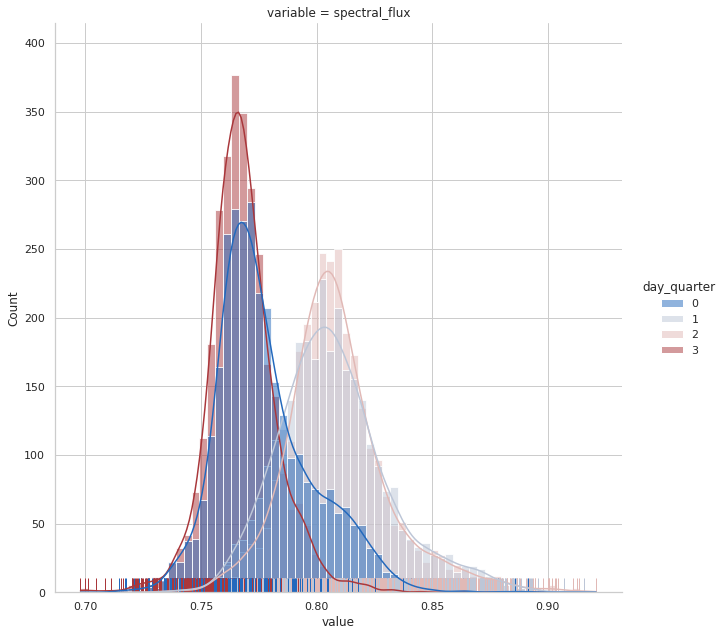

In [ ]:
sns.set(style="whitegrid",
        palette=sns.color_palette("muted", n_colors=6, desat=1.0))
sns.displot(
    data=df_melt,
    x='value',
    hue='day_quarter',
    palette='vlag',
    kde=True,
    rug=True,
    col='variable',
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_spectral_flux_day.png',
            bbox_inches='tight',
            transparent=True)

There has been no noticeable major changes in the distribution.
This suggests that the number of "peaks"/onsets is similar after the rac
provision.
This feature is a discard candidate.

# **Spectral Bandwith**



Bandwidth do espectro descreve o sprectral spread. Ele é definido como sendo a largura da banda da metade do pico da onda (of a largura total da metade do máximo). Segue uma imagem ilustrativa.

Figura ?: Spectral Bandwidth de uma onda



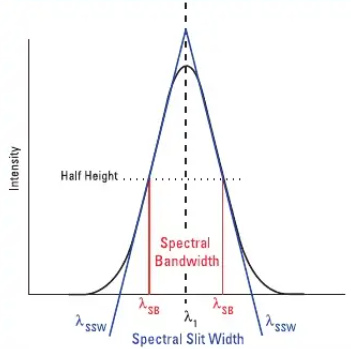

**Fonte**: In: KEPPY, N.; ALLEN, M. Understanding Spectral Bandwidth and Resolution in the Regulated Laboratory. Disponível em: <https://pt.scribd.com/document/51301883/Understanding-Spectral-Bandwidth>.

Nicole Kreuziger Keppy, Michael Allen, Ph.D., Thermo Fisher Scientiﬁc, Madison, 

In [ ]:
print(df.loc[:, [
    'spectral_bandwidth_2', 'spectral_bandwidth_3', 'spectral_bandwidth_4'
]].describe())

In [ ]:
df_melt = pd.melt(df,
                  id_vars=['rac'],
                  value_vars=[
                      'spectral_bandwidth_2', 'spectral_bandwidth_3',
                      'spectral_bandwidth_4'
                  ])
df_melt

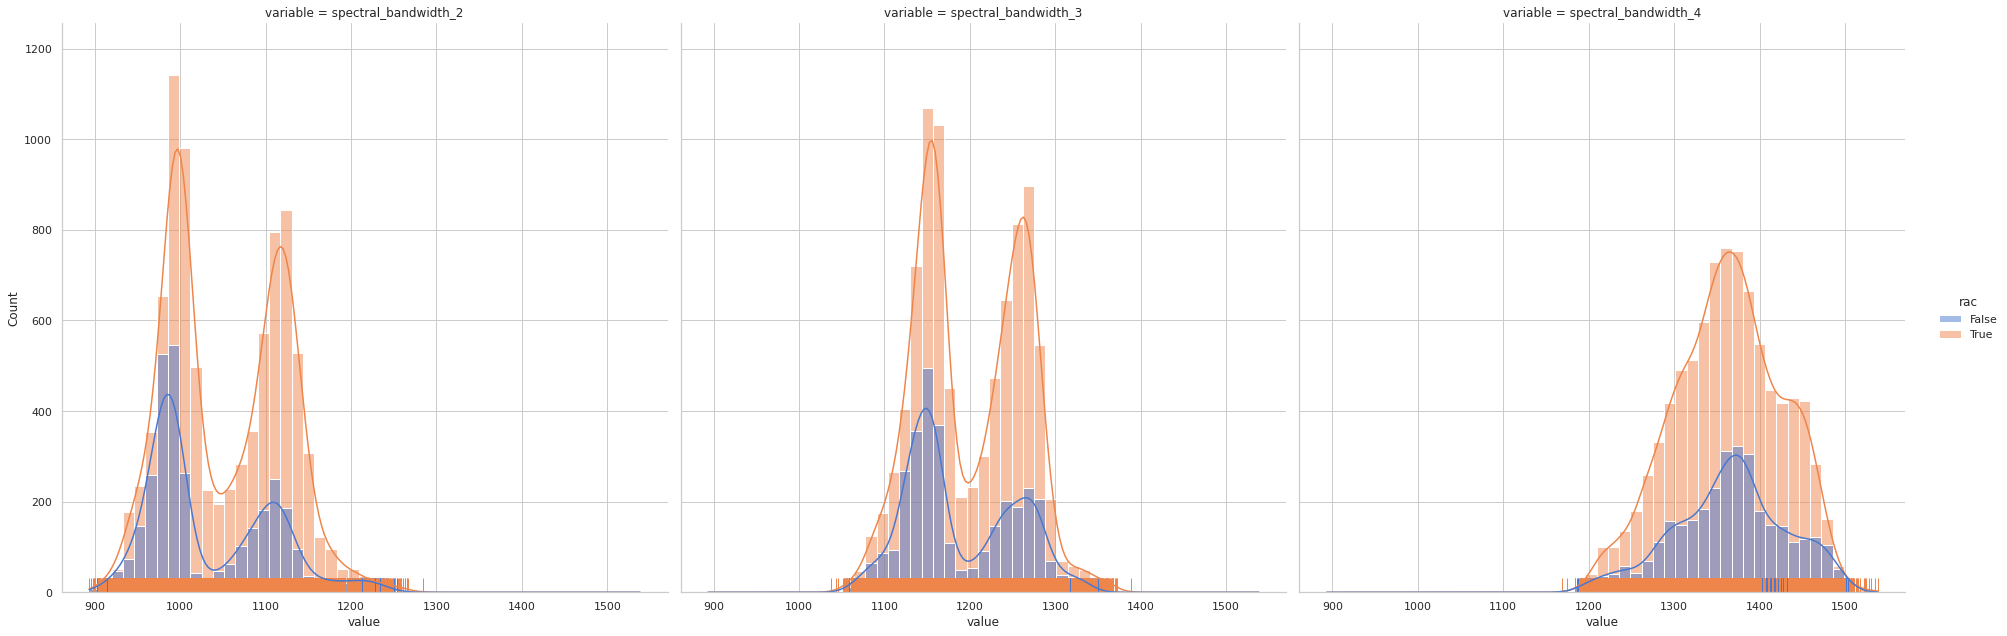

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    col='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1,
)
plt.draw()
plt.savefig(
    f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_spectral_bandwidths_rac.png',
    bbox_inches='tight',
    transparent=True)

No relevant differences in the distributions were observed.

These features are discard candidates.

Further analysis required with correlation heatmap.

DÚVIDA: POR QUEEEEE

# Correlation matrix of subset of features

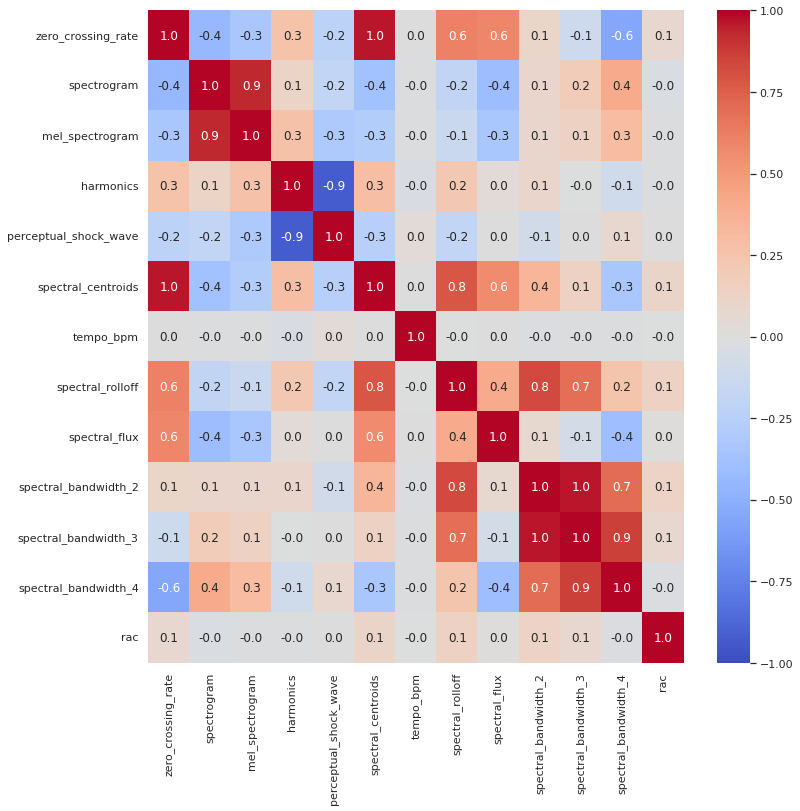

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.loc[:, [
    'zero_crossing_rate', 'spectrogram', 'mel_spectrogram', 'harmonics',
    'perceptual_shock_wave', 'spectral_centroids', 'tempo_bpm',
    'spectral_rolloff', 'spectral_flux', 'spectral_bandwidth_2',
    'spectral_bandwidth_3', 'spectral_bandwidth_4', 'rac'
]].corr(),
            vmin=-1.0,
            vmax=1.0,
            cmap="coolwarm",
            center=0.0,
            robust=True,
            annot=True,
            fmt='.1f')
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_corr.png',
            bbox_inches='tight',
            transparent=True)

The spectral centroids feature had the highest correlation with 'rac',
between the analyzed features.

DÚVIDA: POR QUÊ?

# **MFCC**

Em processamento de som, o ceptrum de frequência Mel (MFC) é um representação que descreve o sinal do espectro e é largamente usado em reconhecimento de fala e algoritmos para transcrição de percussão. Para construí-lo, usa-se a Transformada Linear do Cosseno do log da potência do espectro em uma escala de frequência mel não linar.

O MFC é composto coletivamente pelos coeficientes ceptrais de frequência Mel (MFCCs). Usualmente os coeficiente são calculados em pequenas partições (geralmente de 20 ms) com sobreposições entre elas (sistema de windows e frames). Em vez de usá-los diretamente como features, costumeiramente usa-se a média e a variância de cada coeficiente. Além disso, a derivada temporal de primeira e segunda ordem dos coeficientes, além de suas médias e variâncias, também costumam ser igualmente usadas como features.

---> MFCCs have been widely used in speech recognition [27], musical genre classification [14], speaker clustering [28], and many other audio analysis applications.

Algoritmo de cálculo dos MFCCs é:
1. Cálculo do DFT
2. O espectro resultante é usado como entrada em um banco de filtros de escala Mel. Neste banco, a escala Mel introduz um efeito de distorção de frequência em uma tentativa de adequar o som a certas observações psicoacústicas as quais o sistema auditivo humano pode distinguir mais facilmente. Ao longo dos anos, várias funções de distorção foram propostas. Exemplo:

$$f_w = 1127.01048 \cdot log(1 + f/700)$$

* $f_w$: função frequência de distorção
* $f$: função frequência da onda

Em outras palavras, as frequências das bandas são distribuídas seguindo uma escala Mel ao invés de um frequência linear.

3. Se $\widetilde{O_k}$, $k = 1, ..., L$ é a potência de saída de k-ésimo filtro, então MFFCs são dados pela equação (Transformada Linear do Cosseno):

$$c_m = \sum^{L}_{k = 1} log(\widetilde{O_k})cos[m(k - \frac{1}{2}) \cdot \frac{\pi}{L}]$$ $$m = 1,..., L$$

* $c_m$: m-ésimo coeficiente MFFC
* $L$: quantidade total de filtros

**Dúvida**: porque nao to vendo media e variancia 

obs mffcs eh calculado para cada short term 
em g erla usamos 13 coeficientes
 porque decidiu usar 19?


 The MFCCs have proved to be powerful features in several audio analysis applications. For instance, in the binary classification task of speech vs music, they exhibit significant discriminative capability. Figure 4.14 presents the histograms of the standard deviation of the 2nd MFCC for the binary classification task of speech vs music. It can be seen that the discriminative power of this feature is quite high, and that the estimated Bayesian error is equal to 11.8% using this single feature statistic. It is worth noting that, depending on the task at hand, different subsets of the MFCCs have been used over the years. For example, it has become customary in many music processing applications to select the first 13 MFCCs because they are considered to carry enough discriminative information in the context of various classification tasks.


## Gráfico 1: MFCC de uma onda

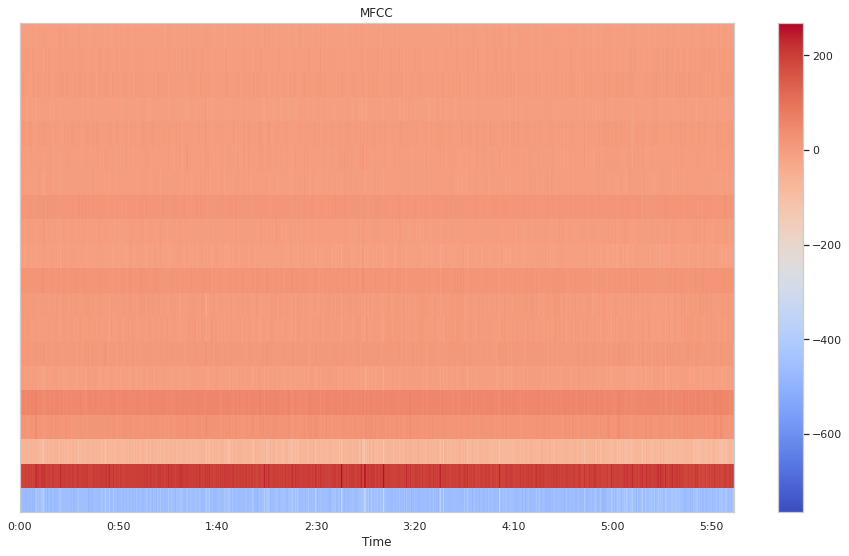

In [ ]:
#lr.feature.mfcc(): calcula os coeficientes cepstral da frequência mel
  #Parâmetro y: audio time series
  #Parâmetro sr: sampling rate of y
  #Parâmetro n_mfcc: number of MFCCs to return
    #DÚVIDA: COMO PODEMOS CONTROLAR ISSO? MFCC NÃO É DEFINIDO JÁ A QNT DE COEFICINETES?
mfccs = lr.feature.mfcc(y=x, sr=sr, n_mfcc=20)
fig, ax = plt.subplots(figsize=(16, 9))
#DÚVIDA: para o specshow, não era necessário uma audio time series? mfccs é uma audio time series?
img = lr.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.draw()
fig.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_mfcc.png')
#DÚVIDA: COMO INTERPRETAR?

## Gráfico 2: Distribuição dos MFFs antes e deposi do RAC

In [ ]:
mfcc_cols = [
    'mfcc0',
    'mfcc1',
    'mfcc2',
    'mfcc3',
    'mfcc4',
    'mfcc5',
    'mfcc6',
    'mfcc7',
    'mfcc8',
    'mfcc9',
    'mfcc10',
    'mfcc11',
    'mfcc12',
    'mfcc13',
    'mfcc14',
    'mfcc15',
    'mfcc16',
    'mfcc17',
    'mfcc18',
    'mfcc19',
]

In [ ]:
print(df.loc[:, mfcc_cols].describe())

In [ ]:
df_melt = pd.melt(df, id_vars=['rac'], value_vars=mfcc_cols)
df_melt

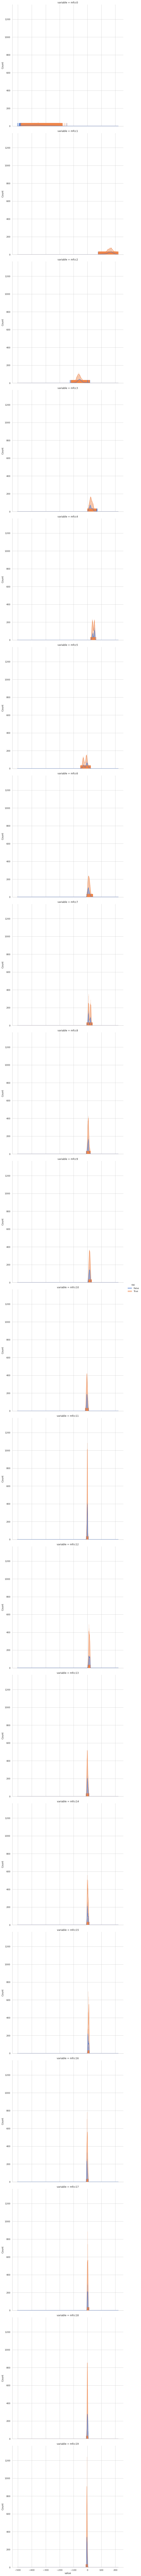

In [ ]:
sns.displot(
    data=df_melt,
    x='value',
    hue='rac',
    row='variable',
    kde=True,
    rug=True,
    height=9,
    aspect=1
)
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_mfccs_rac.png',
            bbox_inches='tight',
            transparent=True)

From related papers, the MFCCs are some of the most representative features.
The main question related the MFCCs is the number of coefficients that will
be used. For most use cases, 12 or 13 coefficients seem to be enough.

TODO Study and write detailed description of MFCC in monograph.

mfcc14 through mfcc19 are discard candidates.

Gráfico 3: Mapa de Calor para a correlação entre os MFCCs

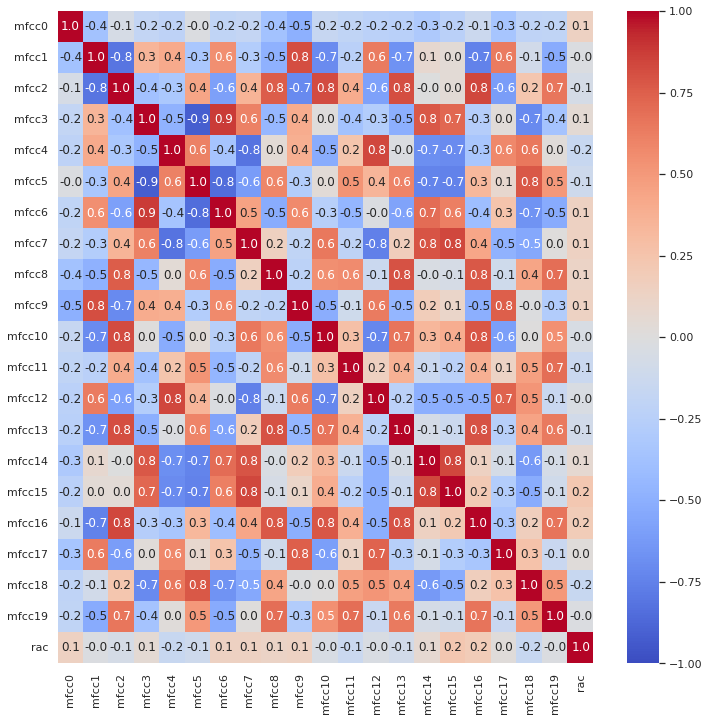

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.loc[:, mfcc_cols + ['rac']].corr(),
            vmin=-1.0,
            vmax=1.0,
            cmap="coolwarm",
            center=0.0,
            robust=True,
            annot=True,
            fmt='.1f')
plt.draw()
plt.savefig(f'{DRIVE_PATH}/output_{FILE_PREFIX}/{FILE_PREFIX}_mfccs_corr.png',
            bbox_inches='tight',
            transparent=True)

Initially the highest absolute correlation with 'rac' is onm mfcc9, mfcc15,
and mfcc16.

The coefficients by themselfs seem to be relatively independent of each
other, taking into account only the correlation matrix.
This may be an indicator of high representativity of the dataset.

# Visualizing discard candidates

In [ ]:
discard_features = [
    'zero_crossings',
    'spectrogram',
    'mel_spectrogram',
    'harmonics',
    'perceptual_shock_wave',
    'tempo_bpm',
    'spectral_flux',
    'spectral_bandwidth_2',
    'spectral_bandwidth_3',
    'spectral_bandwidth_4',
] + chroma_cols + [
    'mfcc14',
    'mfcc15',
    'mfcc16',
    'mfcc17',
    'mfcc18',
    'mfcc19',
    'mfcc14_delta',
    'mfcc15_delta',
    'mfcc16_delta',
    'mfcc17_delta',
    'mfcc18_delta',
    'mfcc19_delta',
    'mfcc14_accelerate',
    'mfcc15_accelerate',
    'mfcc16_accelerate',
    'mfcc17_accelerate',
    'mfcc18_accelerate',
    'mfcc19_accelerate',
]

In [ ]:
print('# of discarded features:', len(discard_features))
print(
    '# of remaining features:',
    df.loc[:, 'zero_crossing_rate':].shape[1] -  # type: ignore
    len(discard_features))
#DÚVIDA: ENTÃO FOI DESCARTADO TUDO ISSO DE FEATURES?
#EM GERAL, SEMPRE TEM PICOS. ISSO NÃO INDICA ALGUMA COISA?

# of discarded features: 40
# of remaining features: 48


# Final comments


 - tempo (bpm);
 - spectral flux;
 - spectral bandwidth;
 - mfcc14, ..., mfcc19.

For now, the remaining features shall be used for further analysis and
data visualization methods, such as SOMs.

If necessary, more features, such as deltas and accelerates, can be
discarded, for performance reasons. The relevance of these features should
be further analyzed.
